**<span style="font-size:30px">Store Sales - Time Series Forecasting</span>**<br>
- 이 대회에서는 에콰도르에 위치한 Favorita 매장에서 판매되는 수천 개의 <u>제품군에 대한 매출을 예측</u>하게 됩니다. <u>훈련 데이터에는 날짜, 매장 및 제품 정보, 해당 품목의 프로모션 진행 여부, 판매 수치가 포함</u>됩니다. 추가 파일에는 모델 구축에 유용할 수 있는 보충 정보가 포함되어 있습니다.<br><br>
  
**<span style="font-size:20px">파일 설명 및 데이터 필드 정보</span>**<br>
- **train.csv**  
store_nbr, family, onpromotion 기능의 시계열과 목표 판매량으로 구성된 학습 데이터입니다.  
store_nbr은 제품이 판매된 스토어를 식별합니다.  
family는 판매된 제품 유형을 식별합니다.  
sales는 특정 날짜에 특정 스토어에서 제품군의 총 판매량을 제공합니다. 제품을 분수 단위로 판매할 수 있으므로 분수 값도 가능합니다(예: 칩 1봉지가 아닌 치즈 1.5kg).  
onpromotion은 지정된 날짜에 스토어에서 프로모션 중인 제품군의 총 품목 수를 제공합니다.<br><br>
- **test.csv**  
학습 데이터와 동일한 기능을 가진 테스트 데이터입니다. 이 파일의 날짜에 대한 목표 매출을 예측합니다.  
테스트 데이터의 날짜는 학습 데이터의 마지막 날짜 이후 15일 동안의 데이터입니다.<br><br>
- **sample_submission.csv**  
올바른 형식의 샘플 제출 파일입니다.<br><br>
- **stores.csv**  
도시, 주, 유형 및 클러스터를 포함한 스토어 메타데이터.  
클러스터는 유사한 스토어들의 그룹입니다.<br><br>
- **oil.csv**  
일일 유가. 훈련 및 테스트 데이터 기간의 값을 모두 포함합니다. (에콰도르는 석유에 의존하는 국가이며 경제 건전성이 유가 충격에 매우 취약합니다.)<br><br>
- **holidays_events.csv**  
공휴일 및 이벤트, 메타데이터 포함<br>
참고: 이전된 열에 특히 주의하세요. 이전된 공휴일은 공식적으로는 해당 달력 날짜에 해당하지만 정부에서 다른 날짜로 옮긴 것입니다. 이전된 날짜는 공휴일이라기보다는 평일과 비슷합니다. 실제로 공휴일로 지정된 날을 찾으려면 유형이 이전인 해당 행을 찾습니다. 예를 들어, 과야킬의 독립 기념일(Independencia de Guayaquil)은 2012-10-09에서 2012-10-12로 이전되었으므로 2012-10-12에 기념되었습니다. Bridge 유형인 날은 공휴일에 추가되는 추가 날입니다(예: 긴 주말에 걸쳐 휴가를 연장하기 위해). 이러한 휴일은 보통 근무일 유형으로 구성되는데, 근무일 유형은 일반적으로 근무가 예정되어 있지 않은 날(예: 토요일)로 브리지를 보상하기 위해 만들어집니다.
추가 휴일은 일반적으로 크리스마스 전후에 발생하는 것처럼 일반 달력 휴일에 추가되는 날입니다(예: 크리스마스 이브를 휴일로 지정).<br><br>
    
<span style="font-size:20px">추가 참고 사항</span><br>
공공 부문의 임금은 2주에 한 번씩 15일과 매월 말일에 지급됩니다. 이로 인해 슈퍼마켓 매출이 영향을 받을 수 있습니다.  
2016년 4월 16일 에콰도르에서 규모 7.8의 지진이 발생했습니다. 지진 발생 후 몇 주 동안 슈퍼마켓 매출에 큰 영향을 미쳤던 생수 및 기타 생필품을 기부하는 구호 활동에 사람들이 모였습니다.<br><br>
링크: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data<br><br>

# 라이브러리 및 설정

In [2]:
from glob import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import koreanize_matplotlib
import seaborn as sns

In [3]:
plt.style.use('ggplot')

# 데이터 로드

In [4]:
# 데이터 로드
file_name = glob('data/*.csv')
file_name = sorted(file_name)

In [5]:
# 파일 목록 확인
file_name

['data\\holidays_events.csv',
 'data\\oil.csv',
 'data\\stores.csv',
 'data\\test.csv',
 'data\\train.csv',
 'data\\transactions.csv']

In [6]:
# 데이터 프레임 리스트
df_list = []

# 파일명마다 csv 파일 데이터 프레임으로 불러오기
for _ in file_name:
    df_name = _.split('\\')[-1].split('.')[0]
    df_list.append(df_name)
    
    file = _.replace('\\', '\\\\')
    exec(f'{df_name} = pd.read_csv("{file}")') # exec 실행시키는 함수

In [7]:
# 데이터 프레임 리스트
df_list

['holidays_events', 'oil', 'stores', 'test', 'train', 'transactions']

# 데이터 확인

## train

In [8]:
# train 데이터 셋
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [9]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [10]:
# 타입 변환 및 파생변수 생성
train['date'] = pd.to_datetime(train['date'])

train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

In [11]:
# 컬럼 순서 정리
train = train[['id', 'date', 'year', 'month', 'day', 'store_nbr', 'family', 'sales', 'onpromotion']].copy()

In [12]:
# 확인
train.head()

,id,date,year,month,day,store_nbr,family,sales,onpromotion
0,0,2013-01-01,2013,1,1,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,2013,1,1,1,BABY CARE,0.0,0
2,2,2013-01-01,2013,1,1,1,BEAUTY,0.0,0
3,3,2013-01-01,2013,1,1,1,BEVERAGES,0.0,0
4,4,2013-01-01,2013,1,1,1,BOOKS,0.0,0


In [13]:
# 수치형 변수 describe
train.drop(columns='id').describe()

,year,month,day,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,2.014838e+03,6.207838e+00,1.563005e+01,2.750000e+01,3.577757e+02,2.602770e+00
std,1.345518e+00,3.385668e+00,8.794789e+00,1.558579e+01,1.101998e+03,1.221888e+01
min,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.014000e+03,3.000000e+00,8.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00
50%,2.015000e+03,6.000000e+00,1.600000e+01,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.016000e+03,9.000000e+00,2.300000e+01,4.100000e+01,1.958473e+02,0.000000e+00
max,2.017000e+03,1.200000e+01,3.100000e+01,5.400000e+01,1.247170e+05,7.410000e+02


- sales 와 onpromotion 사분위수 확인해 보기

In [14]:
# 프로모션 중인 것들만 보기
train[train['onpromotion']!=0]

,id,date,year,month,day,store_nbr,family,sales,onpromotion
810784,810784,2014-04-01,2014,4,1,9,CLEANING,1752.00000,3
810789,810789,2014-04-01,2014,4,1,9,GROCERY I,7685.00000,5
812571,812571,2014-04-02,2014,4,2,9,GROCERY I,6481.00000,3
812587,812587,2014-04-02,2014,4,2,9,POULTRY,613.71704,1
814346,814346,2014-04-03,2014,4,3,9,BREAD/BAKERY,521.00000,1
...,...,...,...,...,...,...,...,...,...
3000877,3000877,2017-08-15,2017,8,15,9,"LIQUOR,WINE,BEER",25.00000,2
3000880,3000880,2017-08-15,2017,8,15,9,PERSONAL CARE,522.00000,11
3000884,3000884,2017-08-15,2017,8,15,9,PREPARED FOODS,154.55300,1
3000885,3000885,2017-08-15,2017,8,15,9,PRODUCE,2419.72900,148


In [15]:
# object 변수 describe
train.describe(include='O')

,family
count,3000888
unique,33
top,AUTOMOTIVE
freq,90936


* 가장 많이 팔고 있는 제품 유형: AUTOMOTIVE

In [16]:
# 판매가 된 제품 중에서 가장 많이 진열되어 있는 제품 유형
train[train['sales']!=0].describe(include='O')

,family
count,2061758
unique,33
top,BREAD/BAKERY
freq,83606


* 판매가 된 제품 중에서 가장 많이 진열되어 있는 제품 유형: BREAD/BAKERY

In [17]:
# 판매가 가장 많이 된 제품 유형
train[train['sales']!=0].groupby('family').agg({'sales':'sum'}).sort_values(by='sales', ascending=False).head(1)

,sales
family,
GROCERY I,3.434627e+08


* 판매가 가장 많이 된 제품 유형: GROCERY

In [18]:
# 판매가 가장 적게 된 제품 유형
train[train['sales']!=0].groupby('family').agg({'sales':'sum'}).sort_values(by='sales', ascending=True).head(1)

,sales
family,
BOOKS,6438.0


* 판매가 가장 적게 된 제품 유형: BOOKS

## holidays_events

In [19]:
# 휴일
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [20]:
# info
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [21]:
# 2012 -> 2013년부터로 변경
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
holidays_events['year'] = holidays_events['date'].dt.year

holidays_events = holidays_events[holidays_events['year']>2012].copy()

In [22]:
# 확인
holidays_events.head()

,date,type,locale,locale_name,description,transferred,year
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False,2013
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False,2013
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False,2013
44,2013-02-11,Holiday,National,Ecuador,Carnaval,False,2013
45,2013-02-12,Holiday,National,Ecuador,Carnaval,False,2013


In [23]:
# type unique
holidays_events['type'].unique()

array(['Holiday', 'Work Day', 'Additional', 'Event', 'Transfer', 'Bridge'],
      dtype=object)

* Additional 휴일: 추가 휴일은 일반적으로 주어진 근무 연도에 추가로 제공되는 휴일입니다. 종종 직원 유지 보상 또는 인센티브의 형태로 제공됩니다.  
* Event 휴일: 이벤트 휴일은 특정 이벤트를 기념하는 휴일입니다. 예를 들어, 미국에서는 Martin Luther King Jr. Day와 President's Day가 모두 이벤트 휴일입니다.  
* Transfer 휴일: 이체 휴일은 일반적으로 주말에 떨어지는 휴일입니다. 종종 평일에 휴일로 대체됩니다.  
* Bridge 휴일: 브리지 휴일은 일반적으로 휴일 전이나 후에 떨어지는 휴일입니다. 종종 휴가로 연장됩니다.

In [24]:
# locale unique
holidays_events['locale'].unique()

array(['National', 'Local', 'Regional'], dtype=object)

* Local 도시, 마을 또는 도시와 같은 특정 지역을 나타냅니다.  
* Regional 주, 국가 또는 대륙과 같은 더 큰 지역을 나타냅니다.

In [25]:
# train 데이터에 있는 날짜만 보기
date = train['date'].astype(str).unique()
re_holidays_events = holidays_events[holidays_events['date'].isin(date)].copy()

In [26]:
# 확인
re_holidays_events

,date,type,locale,locale_name,description,transferred,year
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False,2013
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False,2013
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False,2013
44,2013-02-11,Holiday,National,Ecuador,Carnaval,False,2013
45,2013-02-12,Holiday,National,Ecuador,Carnaval,False,2013
...,...,...,...,...,...,...,...
322,2017-07-25,Additional,Local,Guayaquil,Fundacion de Guayaquil,False,2017
323,2017-08-05,Holiday,Local,Esmeraldas,Fundacion de Esmeraldas,False,2017
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True,2017
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,2017


* Holiday 가 주말?인 경우 transferred 돼서 Transfer type 이 다음에 생김

In [27]:
# 지역별 타입별 휴일 수
re_holidays_events = re_holidays_events.groupby(['locale', 'locale_name', 'type']).agg({'type':'count'}).reindex(index=['National', 'Regional', 'Local'], level=0).copy()

In [28]:
# 확인
re_holidays_events

type
locale   locale_name                    type            
National Ecuador                        Additional    29
                                        Bridge         3
                                        Event         56
                                        Holiday       47
                                        Transfer       7
                                        Work Day       5
Regional Cotopaxi                       Holiday        5
         Imbabura                       Holiday        5
         Santa Elena                    Holiday        4
         Santo Domingo de los Tsachilas Holiday        4
Local    Ambato                         Holiday        8
         Cayambe                        Holiday        5
         Cuenca                         Holiday        5
                                        Transfer       1
         El Carmen                      Holiday        5
         Esmeraldas                     Holiday        5
         Guaranda                       Holiday        9
         Guayaquil                      Additional     5
                                        Holiday        5
                                        Transfer       1
         Ibarra                         Holiday        4
         Latacunga                      Holiday        9
         Libertad                       Holiday        5
         Loja                           Holiday        4
         Machala                        Holiday        5
         Manta                          Holiday        5
         Puyo                           Holiday        5
         Quevedo                        Holiday        4
         Quito                          Additional     4
                                        Holiday        4
         Riobamba                       Holiday       10
         Salinas                        Holiday        4
         Santo Domingo                  Holiday        5

## oil

In [29]:
# "DCOILWTICO"는 원유의 일일 가격 변동을 나타내는 증권 시세
# 원유 수요가 증가하면 "DCOILWTICO" 가격은 올라갈 것이며, 반대로 원유 수요가 감소하면 가격이 내려갈 것
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [30]:
# train 에 있는 날짜만 가져오기
oil['date'] = pd.to_datetime(oil['date'])
re_oil = oil[oil['date'].isin(date)].copy()

<Axes: xlabel='date'>

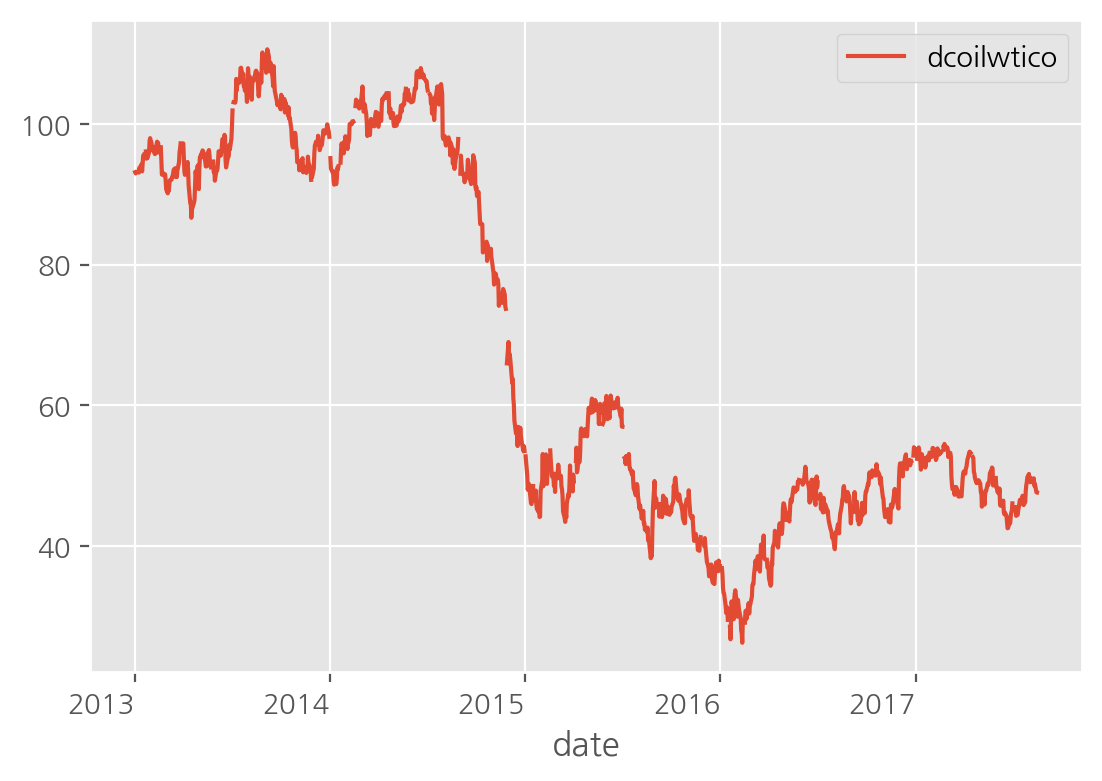

In [31]:
# 시각화
re_oil.plot(x='date', rot=0)

In [32]:
# 결측치
re_oil.loc[re_oil['dcoilwtico'].isna()]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
261,2014-01-01,NaN
274,2014-01-20,NaN


- 결측치 채우기

## stores

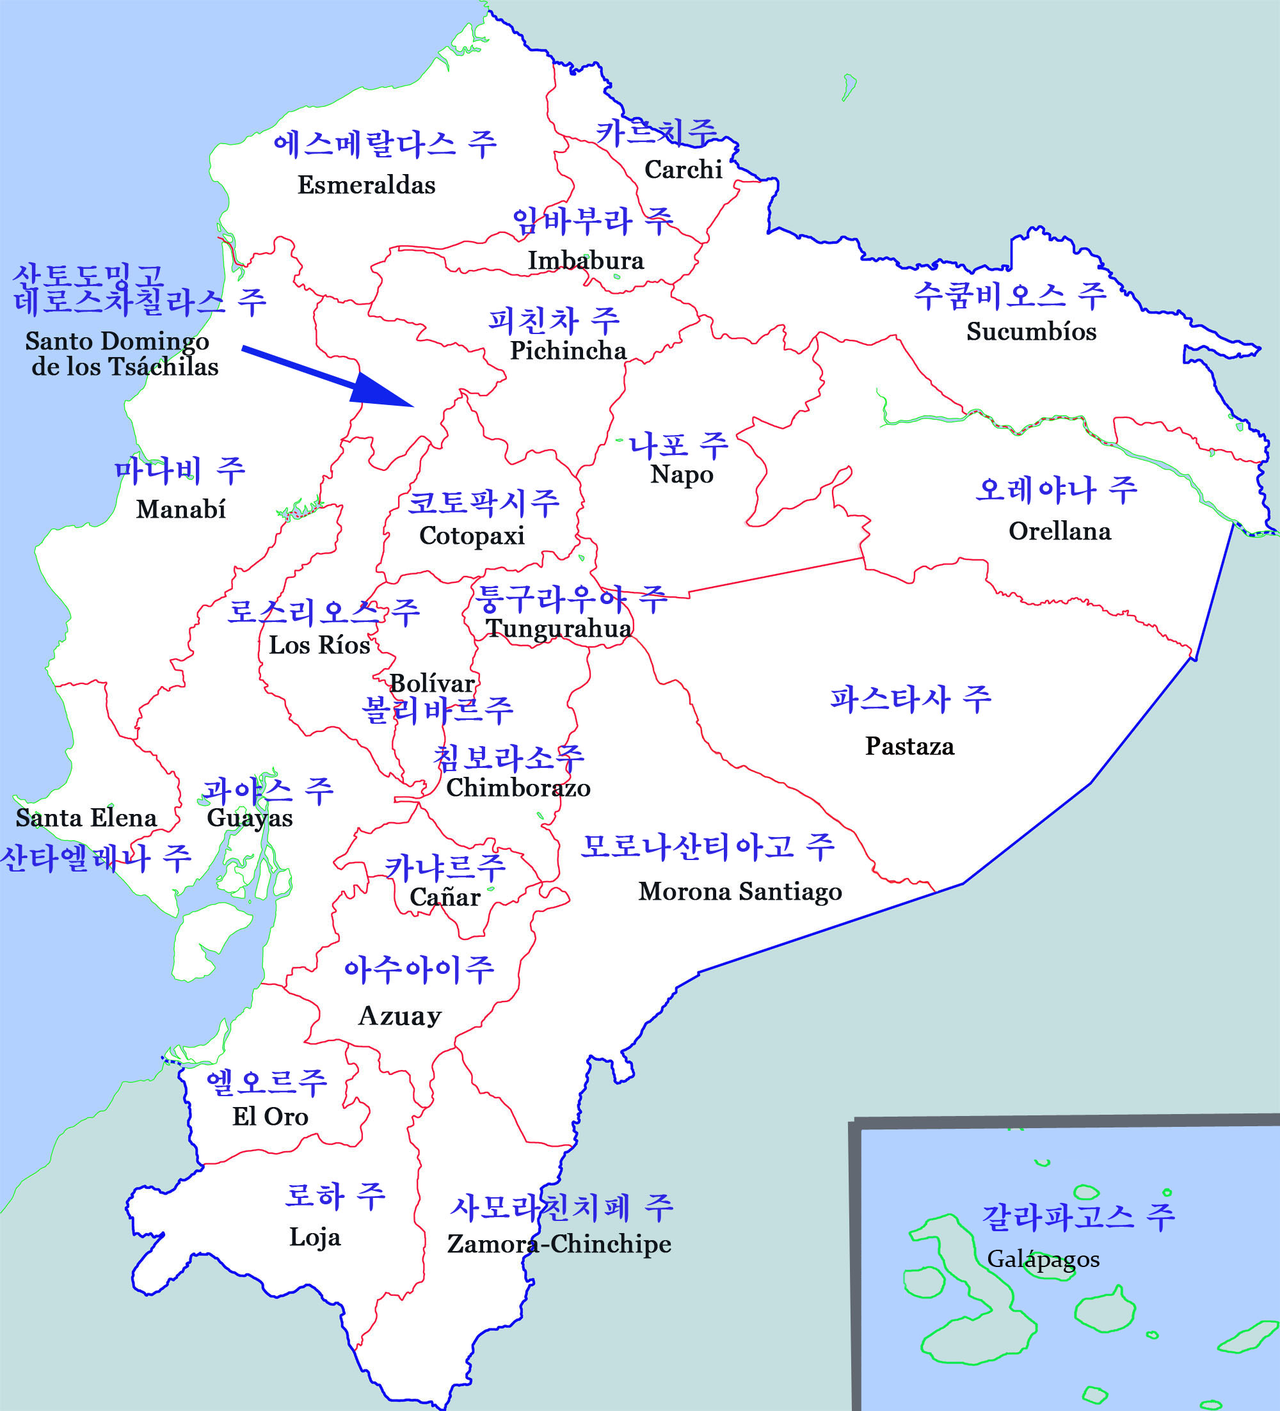

In [33]:
# 매장
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [34]:
# 매장 오픈한 주 - 휴일이 있는 주
set(stores['state'].unique()) - set(holidays_events['locale_name'].unique())

{'Azuay',
 'Bolivar',
 'Chimborazo',
 'El Oro',
 'Guayas',
 'Los Rios',
 'Manabi',
 'Pastaza',
 'Pichincha',
 'Tungurahua'}

In [35]:
# 매장 오픈한 도시 - 휴일이 있는 도시
set(stores['city'].unique()) - set(holidays_events['locale_name'].unique())

{'Babahoyo', 'Daule', 'Playas'}

In [36]:
# 매장별로 개장일이 다름!
train[(train['store_nbr']==20) & (train['sales']!=0)]

,id,date,year,month,day,store_nbr,family,sales,onpromotion
1374318,1374318,2015-02-13,2015,2,13,20,AUTOMOTIVE,29.000,0
1374320,1374320,2015-02-13,2015,2,13,20,BEAUTY,4.000,0
1374321,1374321,2015-02-13,2015,2,13,20,BEVERAGES,2782.000,0
1374323,1374323,2015-02-13,2015,2,13,20,BREAD/BAKERY,1198.000,2
1374325,1374325,2015-02-13,2015,2,13,20,CLEANING,3635.000,2
...,...,...,...,...,...,...,...,...,...
2999530,2999530,2017-08-15,2017,8,15,20,POULTRY,273.341,0
2999531,2999531,2017-08-15,2017,8,15,20,PREPARED FOODS,66.982,0
2999532,2999532,2017-08-15,2017,8,15,20,PRODUCE,1343.671,124
2999533,2999533,2017-08-15,2017,8,15,20,SCHOOL AND OFFICE SUPPLIES,92.000,7


In [37]:
# 매장별로 각 제품유형 마다 들어온 시기가 다름!
train[(train['store_nbr'] == 44) & (train['sales'] != 0)].groupby('family')['day'].count().sort_values()

family
BOOKS                          166
PET SUPPLIES                  1010
SCHOOL AND OFFICE SUPPLIES    1010
LADIESWEAR                    1016
CELEBRATION                   1016
PLAYERS AND ELECTRONICS       1016
HOME CARE                     1044
MAGAZINES                     1060
HOME APPLIANCES               1117
HOME AND KITCHEN II           1166
HOME AND KITCHEN I            1166
LIQUOR,WINE,BEER              1498
HARDWARE                      1553
PRODUCE                       1603
LAWN AND GARDEN               1624
BEAUTY                        1670
LINGERIE                      1678
POULTRY                       1679
PREPARED FOODS                1679
PERSONAL CARE                 1679
MEATS                         1679
AUTOMOTIVE                    1679
GROCERY I                     1679
FROZEN FOODS                  1679
EGGS                          1679
DELI                          1679
DAIRY                         1679
CLEANING                      1679
BREAD/BAKERY 

In [38]:
# BOOKS 는 2016년이 돼서야 들어옴
train[(train['family'] == 'BOOKS') & (train['sales'] != 0)]

,id,date,year,month,day,store_nbr,family,sales,onpromotion
2447977,2447977,2016-10-08,2016,10,8,45,BOOKS,1.0,0
2449759,2449759,2016-10-09,2016,10,9,45,BOOKS,11.0,0
2451541,2451541,2016-10-10,2016,10,10,45,BOOKS,14.0,0
2453125,2453125,2016-10-11,2016,10,11,4,BOOKS,2.0,0
2453323,2453323,2016-10-11,2016,10,11,45,BOOKS,10.0,0
...,...,...,...,...,...,...,...,...,...
2981191,2981191,2017-08-04,2017,8,4,7,BOOKS,1.0,0
2984392,2984392,2017-08-06,2017,8,6,46,BOOKS,1.0,0
2988319,2988319,2017-08-08,2017,8,8,7,BOOKS,1.0,0
2988913,2988913,2017-08-09,2017,8,9,23,BOOKS,2.0,0


In [39]:
# 타입이 판매 제품 유형과 상관이 있을까?
a = (train['store_nbr'] == 1)
train[a]['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [40]:
a = (train['store_nbr'] == 10)
train[a]['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [41]:
# 매장마다 추가되는 제품 유형이 다를 듯?
train[train['date'] == '2013-10-05'].groupby('store_nbr')['sales'].sum()

store_nbr
1      5555.948020
2     10621.556000
3     25572.665070
4      9651.777000
5      7539.178000
6     13934.466000
7      9644.445980
8     15512.151020
9     18203.092000
10     7125.587000
11    20117.201000
12     7515.224000
13     7704.465000
14     9094.222000
15     6329.082000
16     5820.488000
17     8796.728980
18     8125.199000
19     8287.387000
20        0.000000
21        0.000000
22        0.000000
23     6868.958980
24    11617.193000
25     6113.841002
26     4078.598000
27     7596.537010
28     7474.474010
29        0.000000
30     3160.169000
31     7346.069000
32     2880.908000
33     6869.082000
34    10896.400000
35     3447.115999
36     5489.041000
37    10409.680000
38    11672.666000
39    11276.560990
40     6805.431000
41     5343.312000
42        0.000000
43     6485.681000
44    33031.783000
45    28087.148000
46    29323.567000
47    29300.593996
48    25462.270000
49    17549.676000
50    18332.548000
51    13457.750000
52        0.000000
53

In [42]:
# type 별 cluster 별
re_stores = stores.groupby(['type', 'cluster']).agg(lambda x: x)

In [43]:
# 확인
re_stores

store_nbr  \
type cluster                                 
A    5                                  44   
     11                       [45, 49, 52]   
     14                   [46, 47, 48, 50]   
     17                                 51   
B    6             [9, 11, 20, 21, 34, 39]   
     10                                 31   
     16                                 18   
C    3        [16, 30, 32, 33, 35, 40, 54]   
     7                            [14, 22]   
     12                                 17   
     15               [10, 12, 13, 15, 19]   
D    1                        [24, 25, 27]   
     2                            [37, 42]   
     4                         [5, 38, 41]   
     8                           [3, 7, 8]   
     9                             [4, 23]   
     10                                 26   
     13                      [1, 2, 6, 53]   
E    10                   [28, 29, 36, 43]   

                                                           city  \
type cluster                                                      
A    5                                                    Quito   
     11                                   [Quito, Quito, Manta]   
     14                           [Quito, Quito, Quito, Ambato]   
     17                                               Guayaquil   
B    6        [Quito, Cayambe, Quito, Santo Domingo, Guayaqu...   
     10                                                Babahoyo   
     16                                                   Quito   
C    3        [Santo Domingo, Guayaquil, Guayaquil, Quevedo,...   
     7                                         [Riobamba, Puyo]   
     12                                                   Quito   
     15         [Quito, Latacunga, Latacunga, Ibarra, Guaranda]   
D    1                              [Guayaquil, Salinas, Daule]   
     2                                         [Cuenca, Cuenca]   
     4                           [Santo Domingo, Loja, Machala]   
     8                                    [Quito, Quito, Quito]   
     9                                          [Quito, Ambato]   
     10                                               Guayaquil   
     13                            [Quito, Quito, Quito, Manta]   
E    10            [Guayaquil, Guayaquil, Libertad, Esmeraldas]   

                                                          state  
type cluster                                                     
A    5                                                Pichincha  
     11                          [Pichincha, Pichincha, Manabi]  
     14           [Pichincha, Pichincha, Pichincha, Tungurahua]  
     17                                                  Guayas  
B    6        [Pichincha, Pichincha, Pichincha, Santo Doming...  
     10                                                Los Rios  
     16                                               Pichincha  
C    3        [Santo Domingo de los Tsachilas, Guayas, Guaya...  
     7                                    [Chimborazo, Pastaza]  
     12                                               Pichincha  
     15       [Pichincha, Cotopaxi, Cotopaxi, Imbabura, Boli...  
D    1                            [Guayas, Santa Elena, Guayas]  
     2                                           [Azuay, Azuay]  
     4           [Santo Domingo de los Tsachilas, Loja, El Oro]  
     8                        [Pichincha, Pichincha, Pichincha]  
     9                                  [Pichincha, Tungurahua]  
     10                                                  Guayas  
     13               [Pichincha, Pichincha, Pichincha, Manabi]  
E    10                    [Guayas, Guayas, Guayas, Esmeraldas]

* 제품 유형별로도 아니고
* 지역별로 묶인 것도 아님

## transactions

* 거래량 ⊃ 판매량 => 1번의 거래 안에서 N개의 제품이 판매 되었는가

In [44]:
# 거래
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [45]:
# 거래량 많은 매장 확인
transactions.sort_values(by='transactions', ascending=False)

,date,store_nbr,transactions
52011,2015-12-23,44,8359
71010,2016-12-23,44,8307
16570,2013-12-23,44,8256
33700,2014-12-23,44,8120
16572,2013-12-23,46,8001
...,...,...,...
58003,2016-04-18,53,54
57950,2016-04-17,53,33
52428,2016-01-04,1,10
52392,2016-01-02,2,6


In [46]:
# 44번 매장이 아주 잘나가는 구만?
train.groupby('store_nbr').agg({'sales':'mean'}).sort_values(by='sales', ascending=False)

,sales
store_nbr,
44,1117.245254
45,980.673908
47,916.798209
3,908.405495
49,781.330450
46,753.905962
48,646.604950
51,592.231511
8,548.734739


* 44번 매장이 sum 으로 보나 mean 으로 보나 잘나가는 듯

## test

* 목표변수 : sales

In [47]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [48]:
# train 과 똑같이 맞춰주기
test['date'] = pd.to_datetime(test['date'])

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

In [49]:
# 컬럼 순서 정리
test = test[['id', 'date', 'year', 'month', 'day', 'store_nbr', 'family', 'onpromotion']].copy()

In [50]:
# 확인
test.head(55)

,id,date,year,month,day,store_nbr,family,onpromotion
0,3000888,2017-08-16,2017,8,16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,2017,8,16,1,BABY CARE,0
2,3000890,2017-08-16,2017,8,16,1,BEAUTY,2
3,3000891,2017-08-16,2017,8,16,1,BEVERAGES,20
4,3000892,2017-08-16,2017,8,16,1,BOOKS,0
5,3000893,2017-08-16,2017,8,16,1,BREAD/BAKERY,12
6,3000894,2017-08-16,2017,8,16,1,CELEBRATION,0
7,3000895,2017-08-16,2017,8,16,1,CLEANING,25
8,3000896,2017-08-16,2017,8,16,1,DAIRY,45
9,3000897,2017-08-16,2017,8,16,1,DELI,18
